In [3]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [5]:
import pandas as pd

loan_data = pd.read_csv(path_data+'loan_data.csv')
display(loan_data.head(), loan_data.isna().sum())

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64

In [6]:
# exercise 01

"""
The hunt for missing values

Questions about processing missing values are integral to any machine learning interview. If you are provided with a dataset with missing values, not addressing them will likely skew your results and lower your model's accuracy.

In this exercise, you'll practice the first pre-processing step by finding and exploring ways to handle missing values using pandas and numpy on a customer loan dataset.

The dataset, which you'll use for many of the exercises in this course, is saved to your workspace as loan_data.

This is where you are in the pipeline:

Machine learning pipeline
"""

# Instructions

"""

    Print out the features of loan_data along with the number of missing values.
---
    Drop the rows with missing values and print the percentage of rows remaining.
---
    Drop the columns with missing values and print the percentage of columns remaining.
---
    Impute loan_data's missing values with 0 into loan_data_filled
    Compare 'Credit Score' using .describe() before imputation using loan_data and after using loan_data_filled.

"""

# solution

# Import modules
import numpy as np
import pandas as pd

# Print missing values
print(loan_data.isna().sum())

#----------------------------------#

# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

#----------------------------------#

# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

#----------------------------------#

# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

#----------------------------------#

# Conclusion

"""
Great work! The important thing to notice here is that removing rows or columns in this case reduces the dataset way too much to be useful. In the next exercises, you'll examine why imputing might be an improvement with this dataset.
"""

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64
34.347092565515695
70.58823529411765
count    67572.000000
mean       721.601951
std         27.427709
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64
count    88910.000000
mean       548.420729
std        309.109970
min          0.000000
25%  

"\nGreat work! The important thing to notice here is that removing rows or columns in this case reduces the dataset way too much to be useful. In the next exercises, you'll examine why imputing might be an improvement with this dataset.\n"

In [7]:
# exercise 02

"""
Simple imputation

As you saw in the last exercise, deleting data can reduce your dataset by too much. In an interview context, this can lead to biased results of your machine learning model.

A more dynamic way of handling missing values is by imputing them. There are a variety of ways of doing this in python, but in this exercise you will be using the SimpleImputer() function from the sklearn.impute module on loan_data.

You will then use pandas and numpy to convert the imputed dataset into a DataFrame.

Note that 2 steps are now added to the pipeline, Instantiate and Fit: 
Machine learning pipeline
"""

# Instructions

"""

    Subset loan_data's numeric columns and assign them to numeric_cols.
---

    Instantiate a simple imputation object with a mean imputation strategy.
    Fit and transform the data.
---

    Convert the returned array back to a DataFrame.
---

    Print the imputed DataFrame's information using the .info() function to check for missing values.

"""

# solution

# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

#----------------------------------#

# Conclusion

"""
Amazing work! You can cookie cutter the exercise code and just set the strategy keyword to 'median' to impute the median or 'most_frequent' to impute the mode, etc. Let's check out the last exercise in this lesson!
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

"\nAmazing work! You can cookie cutter the exercise code and just set the strategy keyword to 'median' to impute the median or 'most_frequent' to impute the mode, etc. Let's check out the last exercise in this lesson!\n"

In [8]:
# exercise 03

"""
Iterative imputation

In the previous exercise, you derived mean imputations for missing values of loan_data. However, in a machine learning interview, you will probably be asked about more dynamic imputation techniques that rely on other features in the dataset.

In this exercise, you'll practice a machine-learning based approach by imputing missing values as a function of remaining features using IterativeImputer() from sklearn.impute. This is a multivariate imputer that estimates each feature from all of the others in a 'round-robin' fashion.

Note that this function is considered experimental, so please read the documentation for more information.
(https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)
You're at the same place in the Pipeline:

Machine learning pipeline
"""

# Instructions

"""

    Subset loan_data's numeric columns and assign them to numeric_cols.
---

    Instantiate an iterative imputation object with 3 iterations.
    Fit and transform the data.
---

    Convert return array object back to DataFrame.
---

    Print the imputed DataFrame's information using the .info() function to check for missing values.

"""

# solution

# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=3, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())

#----------------------------------#

# Conclusion

"""
Awesome! That wraps up this lesson on finding missing data and what you can do about it. Notice that imputation methods follow the first few steps of the machine learning template that you're already familiar with - Import, Instantiate, Fit - but it uses the fit_transform() function instead. We'll discuss the ML template more throughout the rest of the course!
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

"\nAwesome! That wraps up this lesson on finding missing data and what you can do about it. Notice that imputation methods follow the first few steps of the machine learning template that you're already familiar with - Import, Instantiate, Fit - but it uses the fit_transform() function instead. We'll discuss the ML template more throughout the rest of the course!\n"

In [9]:
# exercise 04

"""
Training vs test set distributions and transformations

If the distribution of test data (not yet seen by the model) is significantly different than the distribution of the training data, what problems can occur? What transformations can be applied to data before passing them to an ML model and why should these transformations be performed?

Select the answer that is false:
"""

# Instructions

"""
Possible Answers

    If the data used to train a model is only slightly different than test or future data, it won't matter and you can go ahead with model tuning. (Answer)
    
    
    If the test data has a different distribution than the training data used to build a model it will likely cause poor performance.
    
    
    The Box-cox function transforms the data depending on the value of the lmbda keyword argument.
    
    
    Log transform can normalize a feature which demonstrates a non-Gaussian distribution.
"""

# solution



#----------------------------------#

# Conclusion

"""
Nice job! It's impossible to tell before passing data through a series of models which will be impacted by different distributions. Save time and ensure distribution similarity!
"""

"\nNice job! It's impossible to tell before passing data through a series of models which will be impacted by different distributions. Save time and ensure distribution similarity!\n"

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

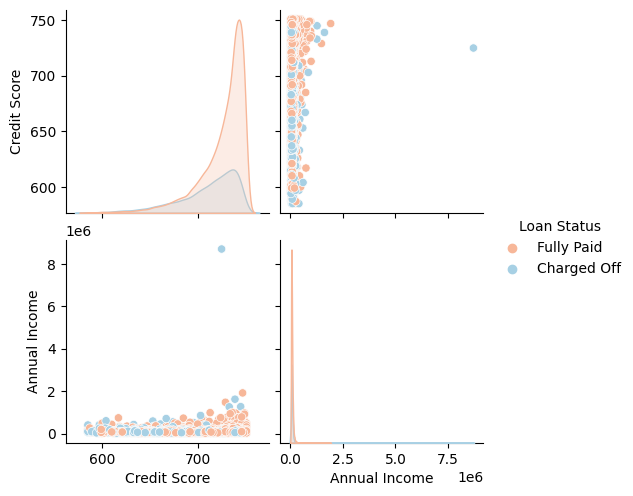

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

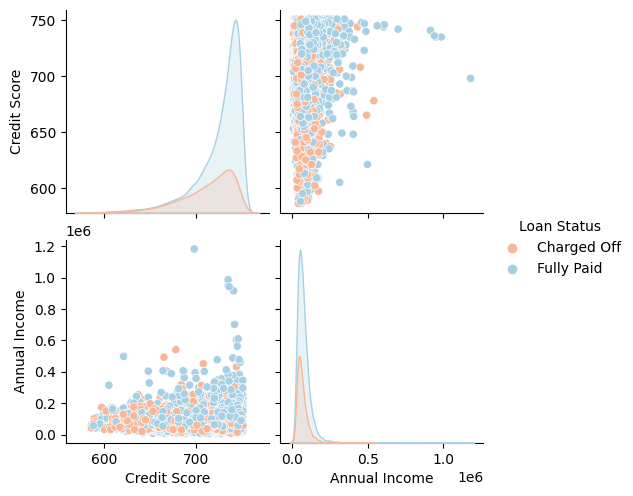

"\nNicely done! Toggle back and forth between the 2 plot matrices if you didn't notice that trainingSet and testSet have different distributions when conditioned on the Loan Status target variable. You'll find out exactly what to do to avoid that in Chapter 2!\n"

In [10]:
# exercise 05

"""
Train/test distributions

In a machine learning interview, you will most certainly work with training data and test data. As discussed earlier, poor model performance can result if the distributions of training and test datasets differ.

In this exercise, you'll use functions from sklearn.model_selection as well as seaborn and matplotlib.pyplot to split loan_data into a training set and a test set, as well as visualize their distributions to spot any discrepancies.

Note that seaborn and matplotlib.pyplot have already been imported to your workspace and aliased as sns and plt, respectively.

The pipeline now includes Train/Test split:

Machine learning pipeline
"""

# Instructions

"""

    Subset loan_data to only the Credit Score and Annual Income features, and the target variable Loan Status in that order.
    Create an 80/20 split of loan_data and assign it to loan_data_subset.
    Create pairplots of trainingSet and testSet (in that order) setting the hue argument to the target variable Loan Status.

"""

# solution

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

#----------------------------------#

# Conclusion

"""
Nicely done! Toggle back and forth between the 2 plot matrices if you didn't notice that trainingSet and testSet have different distributions when conditioned on the Loan Status target variable. You'll find out exactly what to do to avoid that in Chapter 2!
"""

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

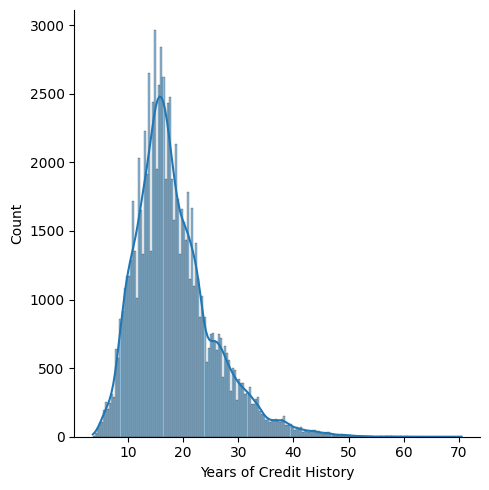

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

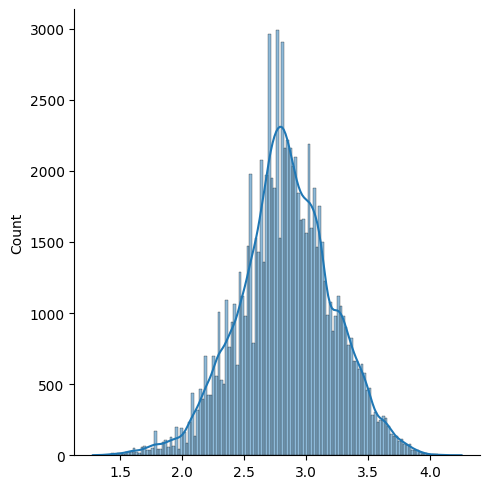

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

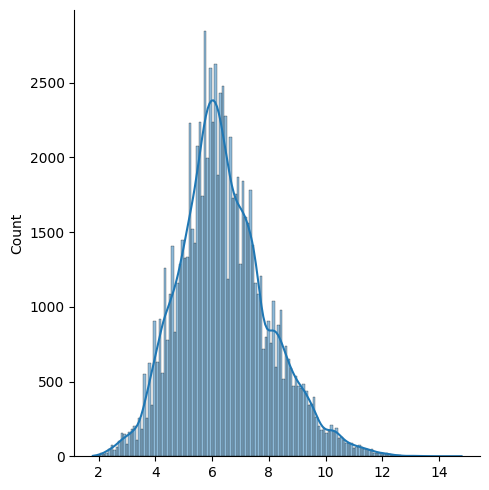

'\nExcellent! Now you know exactly how to apply data transformations and quickly compare before and after plots to improve data going into your machine learning models!\n'

In [13]:
# exercise 06

"""
Log and power transformations

In the last exercise, you compared the distributions of a training set and test set of loan_data. This is especially poignant in a machine learning interview because the distribution observed dictates whether or not you need to use techniques which nudge your feature distributions toward a normal distribution so that normality assumptions are not violated.

In this exercise, you will be using the log and power transformation from the scipy.stats module on the Years of Credit History feature of loan_data along with the distplot() function from seaborn, which plots both its distribution and kernel density estimation.

All relevant packages have been imported for you.

Here is where you are in the pipeline:

Machine learning pipeline
"""

# Instructions

"""

    Subset loan_data for 'Years of Credit History' and plot its distribution and kernel density estimation (kde) using distplot().
---
    Apply a log transformation using the Box-Cox transformation to cr_yrs and plot its distribution and kde.
---
    Transform 'Years of Credit History' using the Box-Cox square-root argument and plot its distribution and kde.

"""

# solution

from scipy.stats import boxcox

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.displot(cr_yrs, kde=True)
plt.show()

#----------------------------------#

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.displot(cr_yrs_log, kde=True)
plt.show()

#----------------------------------#

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.displot(cr_yrs_sqrt, kde=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Excellent! Now you know exactly how to apply data transformations and quickly compare before and after plots to improve data going into your machine learning models!
"""

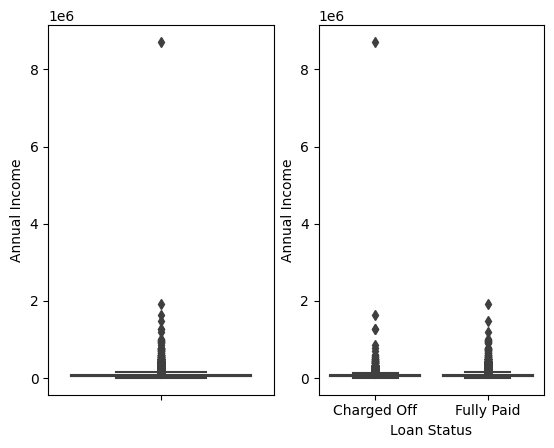

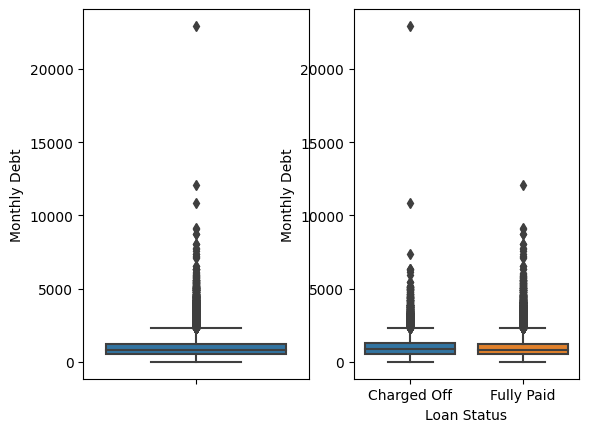

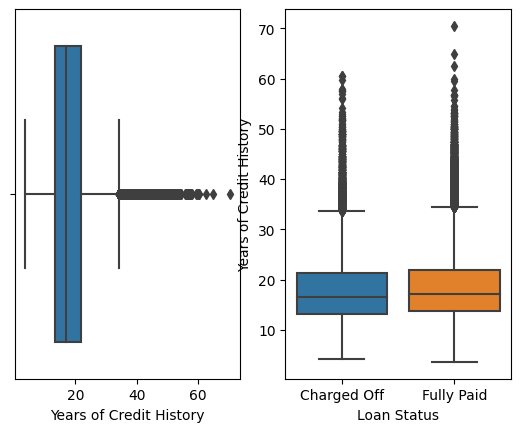

"\nGreat! Scroll through the plots again if you didn't come to your own conclusion that loan_data has outliers that need to be addressed. On to the next exercise where you'll learn what to do about these outliers!\n"

In [14]:
# exercise 07

"""
Outlier detection

A very important aspect of preprocessing your data correctly is outlier detection. In machine learning interview questions, a common question is how to locate and process outliers. An easy way to detect outliers is by visualizing them graphically.

After finding and imputing missing data, finding and figuring out what to do about outliers is another necessary preprocessing step.

There's a variety of packages that let you visualize outliers, but in this exercise, you will be using seaborn to plot univariate and multivariate boxplots of selected columns of loan_data.

All relevant packages have been imported for you.

Where are you with the pipeline?

Machine learning pipeline
"""

# Instructions

"""

    Create a univariate boxplot using the feature Annual Income from loan_data.
    Create a multivariate boxplot conditioned on Loan Status using the feature Annual Income from loan_data.
---
    Create a univariate boxplot using the feature Monthly Debt from loan_data.
    Create a multivariate boxplot conditioned on Loan Status using the feature Monthly Debt from loan_data.
---
    Create a univariate boxplot using the feature Years of Credit History from loan_data.
    Create a multivariate boxplot conditioned on Loan Status using the feature Years of Credit History from loan_data.

"""

# solution

# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

#----------------------------------#

# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()

#----------------------------------#

# Import modules
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

#----------------------------------#

# Conclusion

"""
Great! Scroll through the plots again if you didn't come to your own conclusion that loan_data has outliers that need to be addressed. On to the next exercise where you'll learn what to do about these outliers!
"""

In [18]:
from scipy.stats import mstats
from scipy import stats

In [22]:
categoric_cols = loan_data.select_dtypes(include=[object])


In [23]:
# exercise 08

"""
Handling outliers

In the last exercise, you learned how visualizing outliers could come in handy in a machine learning interview. Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.

In this exercise, you will use the scipy.stats module to calculate the Z-score using the stats.zscore() function and the mstats.winsorize() function to replace outliers using a technique called Winsorizing.

Recall from the video lesson that those points above and/or below 1.5 times the IQR should be suspected as possible outliers. For the last step in this exercise, that value is 2120.

The relevant packages have been imported for you, and loan_data's numeric and categorical columns have been subset and saved as numeric_cols and categoric_cols, respectively.
"""

# Instructions

"""

    Create an index of rows to keep for absolute z-scores less than 3 on the numeric columns and use it to index and concatenate subsets.
---
    Winsorize 'Monthly Debt' with 5% upper and lower limits and print the mean, median and max before and after.
---
    Find the median of the values of Monthly Debt that are lower than 2120 and replace outliers with it.

"""

# solution

# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

#----------------------------------#

# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

#----------------------------------#

# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

#----------------------------------#

# Conclusion

"""
Great work! Notice how the median didn't change when you dropped or winsorized, but it did when you replaced outliers with the median in the last step. This is because only the right tail outliers got replaced causing the median to shift!
"""

Current Loan Amount             11937.624913
Credit Score                      721.601951
Years in current job                5.721263
Annual Income                   72345.745264
Monthly Debt                      963.102059
Years of Credit History            18.315313
Months since last delinquent       35.080289
Number of Open Accounts            11.110348
Number of Credit Problems           0.160477
Current Credit Balance          15435.932752
Maximum Open Credit             33568.124339
Bankruptcies                        0.112672
Tax Liens                           0.028222
dtype: float64
Current Loan Amount             10201.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Problems           0.000
Current Credit Balance

"\nGreat work! Notice how the median didn't change when you dropped or winsorized, but it did when you replaced outliers with the median in the last step. This is because only the right tail outliers got replaced causing the median to shift!\n"

In [24]:
# exercise 09

"""
Z-score standardization

In the last exercise, you calculated the Z-score to address outliers. In a machine learning interview, another question might be where else Z-scores are used. They are often used for scaling your data prior to creating a model.

In this exercise you'll use a function from sklearn.preprocessing that was introduced in the video lesson to standardize the numeric feature columns in the loan_data dataset. Recall that this scales the data so that it has a mean of 0 and standard deviation of 1.

The sklearn.preprocessing module has already been imported for you.

Pipeline snapshot:
"""

# Instructions

"""

    Create a subset of the numeric and categorical columns in loan_data.
---

    Instantiate a standard scaler object and assign it to scaler.
---

    Fit and transform the relevant columns with a call to the appropriate method, then convert the returned object back to a DataFrame.
---

    Concatenate the categorical and scaled numeric columns.

"""

# solution

from sklearn.preprocessing import StandardScaler

# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())

#----------------------------------#

# Conclusion

"""
Amazing work! If you want to try your hand at scaling the data so that it falls between 0 and 1, simply import MinMaxScaler from sklearn.preprocessing instead of StandardScaler and follow these exact steps. That wraps up this chapter on data preprocessing steps. See you in Chapter 2 for Supervised Learning!
"""

   Current Loan Amount  Credit Score  Years in current job  Annual Income  \
0             0.032520      0.233271             -1.312259      -0.440413   
1             1.444549      0.415570              1.189261       0.149986   
2             0.461696      0.087432              0.911314      -0.204037   
3            -0.024483      0.670788             -0.756366      -0.654119   
4            -0.237359     -1.298038              1.189261      -0.434244   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0     -0.195819                -0.044731                     -1.139583   
1      0.055307                 1.189463                           NaN   
2      0.825827                -0.229151                     -0.139960   
3      0.271730                -1.179622                           NaN   
4     -0.795018                -0.229151                     -0.458022   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0          

'\nAmazing work! If you want to try your hand at scaling the data so that it falls between 0 and 1, simply import MinMaxScaler from sklearn.preprocessing instead of StandardScaler and follow these exact steps. That wraps up this chapter on data preprocessing steps. See you in Chapter 2 for Supervised Learning!\n'